## Small projects seperated by Excel
+ the median of their social network is smaller than 50
+ Calculate Features of overall project continuity(overlaps over time), individual continuity(developers and models, continuing edges)

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import seaborn as sns

from matplotlib import pyplot as plt
from hdbscan import HDBSCAN 

In [2]:
df_socialsize_graduate = pd.read_csv("./social_edgesize_graduated_labeled.csv", index_col=0, header=None)
df_socialsize_retired = pd.read_csv("./social_edgesize_retired_labeled.csv", index_col=0, header=None)

In [3]:
### Faster
time_resolution = 30
time_window = 5

df_tech_overlaps = pd.read_csv("../result_csv/tech_overlaps_smoothed"+str(time_resolution+time_window)+".csv")
df_social_overlaps = pd.read_csv("../result_csv/social_overlaps_smoothed"+str(time_resolution+time_window)+".csv")
df_tech_edgesize = pd.read_csv("../result_csv/tech_edgesize_smoothed"+str(time_resolution+time_window)+".csv")
df_social_edgesize = pd.read_csv("../result_csv/social_edgesize_smoothed"+str(time_resolution+time_window)+".csv")

all_graduated = np.load('../all_graduated.npy').tolist()
#all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('../all_retired.npy').tolist()
#all_retired = [x.lower() for x in all_retired]

all_graduated = [x.lower() for x in all_graduated if x.lower() in df_tech_overlaps.columns and x.lower() in df_social_overlaps.columns]
all_retired = [x.lower() for x in all_retired if x.lower() in df_tech_overlaps.columns and x.lower() in df_social_overlaps.columns]

In [4]:
df_socialsize_graduate.columns=["Feature"+str(x) for x in range(17)]
df_socialsize_retired.columns=["Feature"+str(x) for x in range(17)]

In [5]:
df_socialsize_graduate = df_socialsize_graduate.where(df_socialsize_graduate["Feature16"]==1).dropna()

In [6]:
df_socialsize_retired = df_socialsize_retired.where(df_socialsize_retired["Feature16"]==1).dropna()

In [7]:
df_socialsize_graduate = df_socialsize_graduate.where(df_socialsize_graduate["Feature15"]<50).dropna()

In [8]:
df_socialsize_retired = df_socialsize_retired.where(df_socialsize_retired["Feature15"]<50).dropna()

In [9]:
len(df_socialsize_graduate)

47

In [10]:
len(df_socialsize_retired)

34

### Network Size of 2 Groups

<AxesSubplot:>

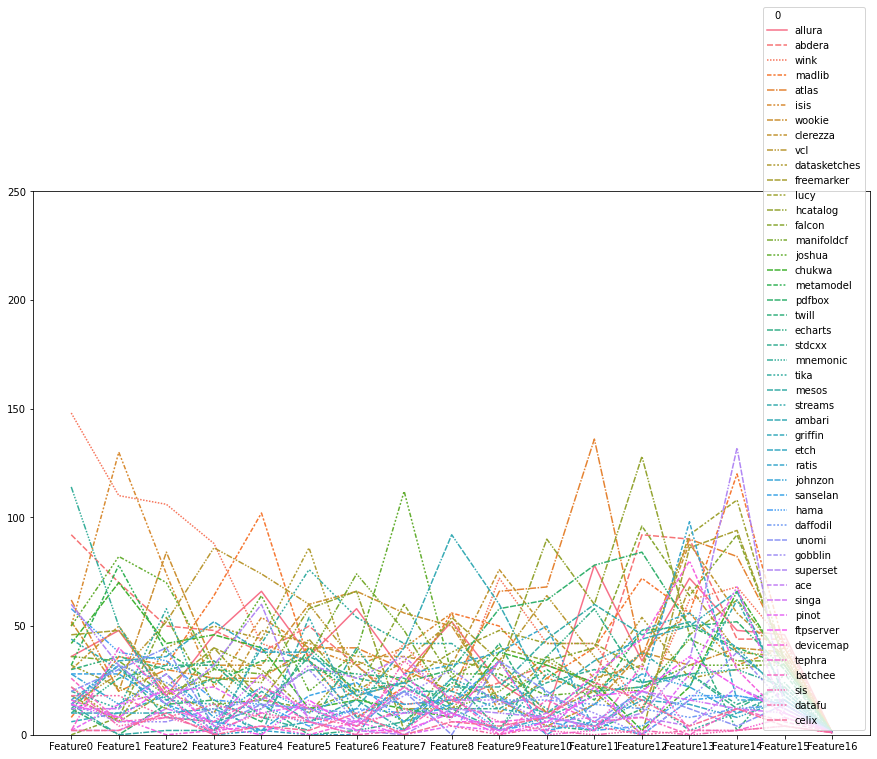

In [11]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_socialsize_graduate.T)

<AxesSubplot:>

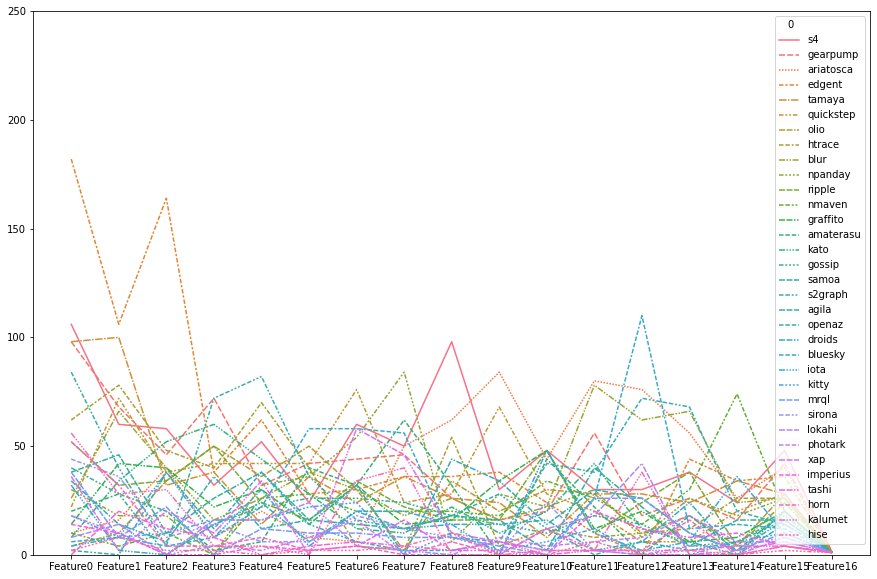

In [12]:
plt.figure(figsize=(15, 10))
plt.ylim(0,250)
sns.lineplot(data= df_socialsize_retired.T)

### Overlaps overtime of 2 groups

In [13]:
df_socialsize_retired.T.columns

Index(['s4', 'gearpump', 'ariatosca', 'edgent', 'tamaya', 'quickstep', 'olio',
       'htrace', 'blur', 'npanday', 'ripple', 'nmaven', 'graffito',
       'amaterasu', 'kato', 'gossip', 'samoa', 's2graph', 'agila', 'openaz',
       'droids', 'bluesky', 'iota', 'kitty', 'mrql', 'sirona', 'lokahi',
       'photark', 'xap', 'imperius', 'tashi', 'horn', 'kalumet', 'hise'],
      dtype='object', name=0)

<AxesSubplot:>

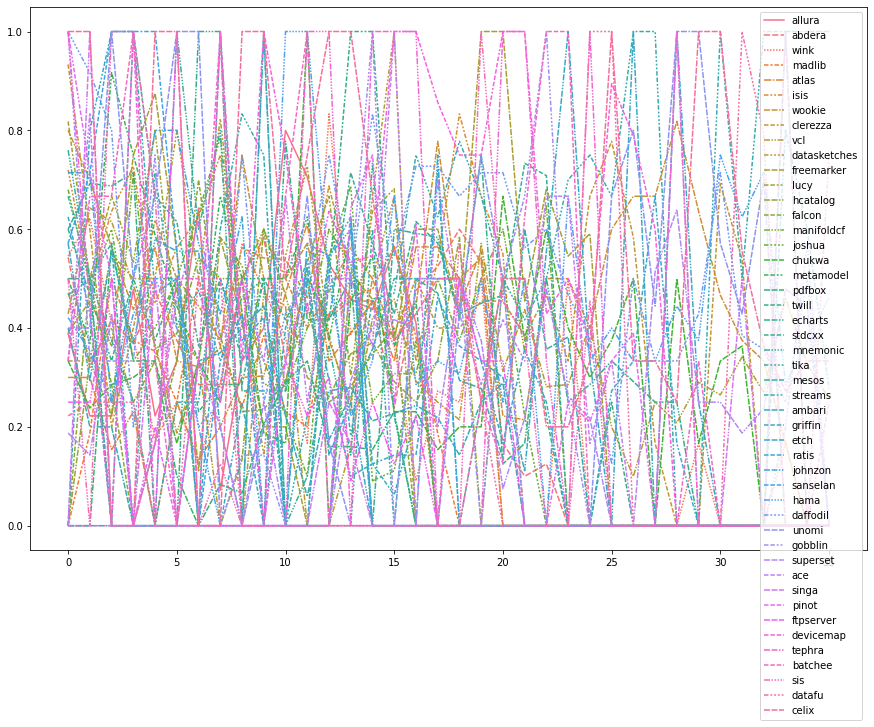

In [14]:
plt.figure(figsize=(15, 10))
#plt.ylim(0,250)
sns.lineplot(data= df_social_overlaps[df_socialsize_graduate.T.columns][:36].replace(-1.0, 0))

<AxesSubplot:>

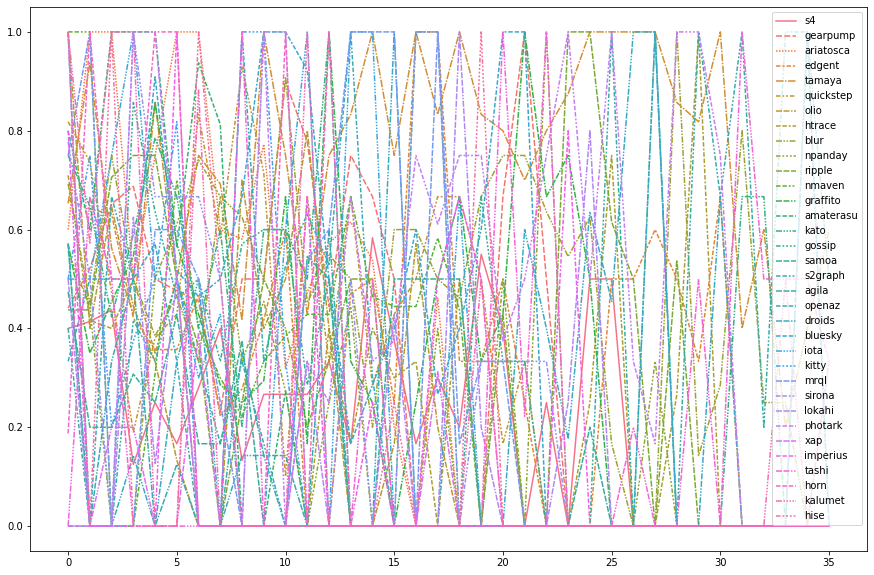

In [15]:
plt.figure(figsize=(15, 10))
#plt.ylim(0,250)
sns.lineplot(data= df_social_overlaps[df_socialsize_retired.T.columns][:36].replace(-1.0, 0))

+ Look at there median